In [1]:
## Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('game_info_cleaned.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17517 entries, 0 to 17516
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            17517 non-null  object 
 1   Genre            17517 non-null  object 
 2   Console          17517 non-null  object 
 3   Publisher        17517 non-null  object 
 4   Total Sales (m)  17517 non-null  float64
 5   NA Sales (m)     17517 non-null  float64
 6   EU Sales (m)     17517 non-null  float64
 7   JP Sales (m)     17517 non-null  float64
 8   Other Sales (m)  17517 non-null  float64
 9   Release Month    17517 non-null  int64  
 10  Release Year     17517 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [4]:
dataset.head(10)

,Title,Genre,Console,Publisher,Total Sales (m),NA Sales (m),EU Sales (m),JP Sales (m),Other Sales (m),Release Month,Release Year
0,Tomb Raider II,Adventure,PS,Eidos Interactive,5.24,2.30,2.46,0.20,0.28,10,1997
1,LEGO Indiana Jones: The Original Adventures,Adventure,X360,LucasArts,3.76,2.40,1.01,0.00,0.36,6,2008
2,Tomb Raider III: Adventures of Lara Croft,Adventure,PS,Eidos Interactive,3.54,1.66,1.58,0.12,0.18,11,1998
3,LEGO Batman: The Videogame,Adventure,X360,Warner Bros. Interactive,3.44,2.07,1.04,0.00,0.34,9,2008
4,L.A. Noire,Adventure,PS3,Rockstar Games,3.21,1.29,1.31,0.12,0.49,11,2011
5,Club Penguin: Elite Penguin Force,Adventure,DS,Disney Interactive Studios,3.14,1.87,0.97,0.00,0.30,11,2008
6,LEGO Batman: The Videogame,Adventure,Wii,Warner Bros. Interactive,3.08,1.80,0.98,0.00,0.29,9,2008
7,LEGO Batman: The Videogame,Adventure,DS,Warner Bros. Interactive,3.06,1.75,1.02,0.00,0.29,9,2008
8,L.A. Noire,Adventure,X360,Rockstar Games,2.73,1.55,0.92,0.02,0.24,11,2011
9,Harry Potter and the Chamber of Secrets,Adventure,PS2,Electronic Arts,2.61,0.90,1.22,0.04,0.44,11,2002


In [5]:
dataset.isnull().values.any()

False

In [6]:
## Defining the features and the dependent variable
x = dataset.iloc[:,1:0].values
y = dataset.iloc[:,4].values
print(x[0])
print(y)

[]
[5.24 3.76 3.54 ... 0.01 0.01 0.01]


In [7]:
# Retaining only the useful features of the dataset
# From the heatmap, we can decipher that the columns NA_Sales,JP_Sales,EU_Sales and Other_Sales are the most useful features
# in determining the global sales
x = dataset.iloc[:,5: -2].values
print(x[0])

[2.3  2.46 0.2  0.28]


In [8]:
## Splitting the dataset into independent and dependent vaiables
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[0.06 0.02 0.   0.  ]
 [0.   0.01 0.   0.  ]
 [0.01 0.01 0.   0.  ]
 ...
 [0.09 0.01 0.   0.01]
 [0.12 0.09 0.   0.03]
 [0.   0.   0.23 0.  ]]
[[0.05 0.01 0.   0.  ]
 [0.   0.   0.29 0.  ]
 [0.   0.   0.02 0.  ]
 ...
 [0.   0.07 0.   0.01]
 [1.56 1.4  0.07 0.5 ]
 [0.   0.03 0.   0.  ]]
[0.08 0.01 0.02 ... 0.1  0.25 0.23]
[0.06 0.29 0.02 ... 0.08 3.54 0.04]


In [10]:
## Training the multiple linear regression on the training set
from sklearn.linear_model import LinearRegression
regressor_MultiLinear = LinearRegression(fit_intercept=False)
regressor_MultiLinear.fit(x_train,y_train)

LinearRegression(fit_intercept=False)

In [11]:
## Predicting test results
y_pred = regressor_MultiLinear.predict(x_test)

In [12]:
# Calculating r2 score
from sklearn.metrics import r2_score
r2_MultiLinear = r2_score(y_test,y_pred)
print(r2_MultiLinear)

0.9999629546432796


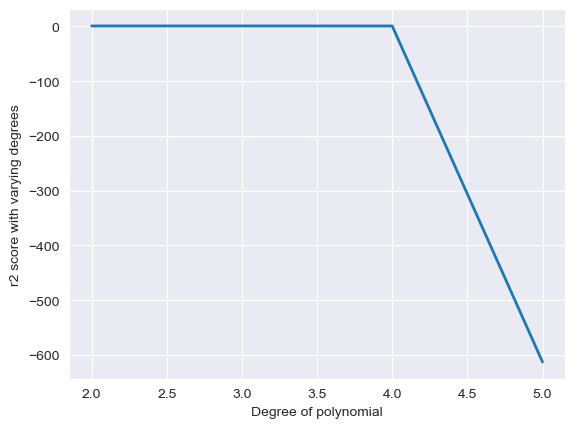

In [13]:
## Finding out the optimal degree of polynomial regression
from sklearn.preprocessing import PolynomialFeatures
sns.set_style('darkgrid')
scores_list = []
pRange = range(2,6)
for i in pRange :
    poly_reg = PolynomialFeatures(degree=i)
    x_poly = poly_reg.fit_transform(x_train)
    poly_regressor = LinearRegression()
    poly_regressor.fit(x_poly,y_train)
    y_pred = poly_regressor.predict(poly_reg.fit_transform(x_test))
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(pRange,scores_list,linewidth=2)
plt.xlabel('Degree of polynomial')
plt.ylabel('r2 score with varying degrees')
plt.show()

In [14]:
## Training the polynomial regression on the training model
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_train)
poly_regressor = LinearRegression()
poly_regressor.fit(x_poly,y_train)
y_pred = poly_regressor.predict(poly_reg.fit_transform(x_test))
r2_poly = r2_score(y_test,y_pred)
print(r2_poly)

0.9999622868824117


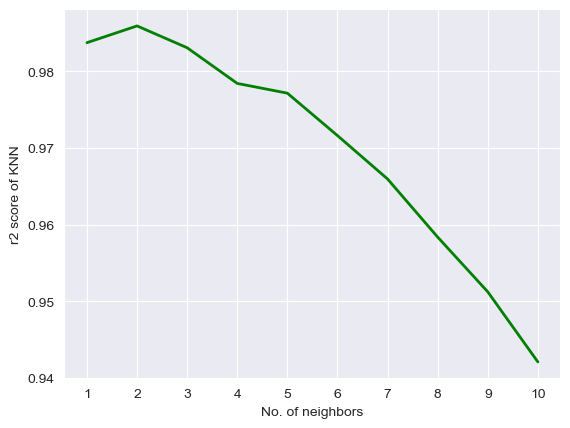

In [15]:
## Finding the optimal number of neighbors for KNN regression
from sklearn.neighbors import KNeighborsRegressor
knnRange = range(1,11,1)
scores_list = []
for i in knnRange:
    regressor_knn = KNeighborsRegressor(n_neighbors=i)
    regressor_knn.fit(x_train,y_train)
    y_pred = regressor_knn.predict(x_test)
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(knnRange,scores_list,linewidth=2,color='green')
plt.xticks(knnRange)
plt.xlabel('No. of neighbors')
plt.ylabel('r2 score of KNN')
plt.show()   

In [16]:
# Training the KNN model on the training set
regressor_knn = KNeighborsRegressor(n_neighbors=7)
regressor_knn.fit(x_train,y_train)
y_pred = regressor_knn.predict(x_test)
r2_knn = r2_score(y_test,y_pred)
print(r2_knn)

0.9659434864064383


In [17]:
# Training the Decision Tree regression on the training model
from sklearn.tree import DecisionTreeRegressor
regressor_Tree = DecisionTreeRegressor(min_samples_leaf=30)
regressor_Tree.fit(x_train,y_train)

DecisionTreeRegressor(min_samples_leaf=30)

In [18]:
# Predicting test results
y_pred = regressor_Tree.predict(x_test)

In [19]:
# Calculating r2 score
r2_tree = r2_score(y_test,y_pred)
print(r2_tree)

0.7785734863116214


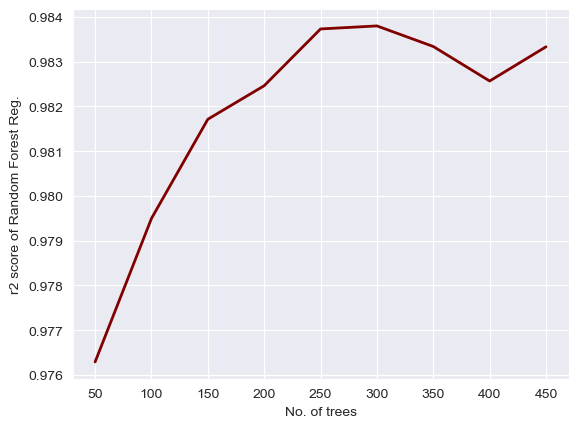

In [20]:
# Finding out the optimal number of trees for Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
forestRange=range(50,500,50)
scores_list=[]
for i in forestRange: 
    regressor_Forest = RandomForestRegressor(n_estimators=i,random_state=0)
    regressor_Forest.fit(x_train,y_train)
    y_pred = regressor_Forest.predict(x_test)
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(forestRange,scores_list,linewidth=2,color='maroon')
plt.xticks(forestRange)
plt.xlabel('No. of trees')
plt.ylabel('r2 score of Random Forest Reg.')
plt.show()    

In [21]:
# Training the Random Forest regression on the training model
regressor_Forest = RandomForestRegressor(n_estimators=100,random_state=0)
regressor_Forest.fit(x_train,y_train)
y_pred = regressor_Forest.predict(x_test)
r2_forest = r2_score(y_test,y_pred)
print(r2_forest)
print(r2_forest.summary())

0.9794970685198031


AttributeError: 'numpy.float64' object has no attribute 'summary'

In [ ]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(np.reshape(y_train,(len(y_train),1)))
y_test = sc_y.transform(np.reshape(y_test,(len(y_test),1)))

In [ ]:
print(x_train)
print(x_test)
print(y_test)
print(y_train)

In [ ]:
## Training the Linear SVR model on the training set
from sklearn.svm import SVR
regressor_SVR = SVR(kernel='linear')
regressor_SVR.fit(x_train,y_train)

In [ ]:
## Predicting test results
y_pred = regressor_SVR.predict(x_test)

In [ ]:
## Calculating r2 score
r2_linearSVR = r2_score(y_test,y_pred)
print(r2_linearSVR)

In [ ]:
## Training the Non-linear SVR model on the training set
from sklearn.svm import SVR
regressor_NonLinearSVR = SVR(kernel='rbf')
regressor_NonLinearSVR.fit(x_train,y_train)

In [ ]:
## Predicting test results
y_pred = regressor_NonLinearSVR.predict(x_test)

In [ ]:
## Calculating r2 score
r2_NonlinearSVR = r2_score(y_test,y_pred)
print(r2_NonlinearSVR)

In [ ]:
## Applying XGBoost Regression model on the training set
!pip install xgboost
from xgboost import XGBRegressor
regressor_xgb = XGBRegressor()
regressor_xgb.fit(x_train,y_train)

In [ ]:
## Predicting test results
y_pred = regressor_xgb.predict(x_test)

In [ ]:
## Calculating r2 score
r2_xgb = r2_score(y_test,y_pred)
print(r2_xgb)

In [ ]:
## Comparing the r2 scores of different models
labelList = ['Multiple Linear Reg.','Polynomial Reg.','K-NearestNeighbors','Decision Tree','Random Forest',
             'Linear SVR','Non-Linear SVR','XGBoost Reg.']
mylist = [r2_MultiLinear,r2_poly,r2_knn,r2_tree,r2_forest,r2_linearSVR,r2_NonlinearSVR,r2_xgb]
for i in range(0,len(mylist)):
    mylist[i]=np.round(mylist[i]*100,decimals=3)
print(mylist)

In [ ]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=labelList,y=mylist)
plt.yticks(np.arange(0, 101, step=10))
plt.title('r2 score comparison among different regression models',fontweight='bold')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.3f}%'.format(height), (x +0.25, y + height + 0.8))
plt.show()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

#importing the dataset
Dataset = pd.read_csv('game_info_cleaned.csv')
#Label Encoding
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
Dataset

In [ ]:

Dataset['Console'] = number.fit_transform(Dataset['Console'].astype('str'))
Dataset['Genre'] = number.fit_transform(Dataset['Genre'].astype('str'))
Dataset['Publisher'] = number.fit_transform(Dataset['Publisher'].astype('str'))

#extracting the feature vector and the dependant variable vector

columns = ["Console", "Genre", "Publisher", "NA Sales (m)", "EU Sales (m)","JP Sales (m)"]
y = Dataset["Total Sales (m)"].values
X = Dataset[list(columns)].values

#importing the linear model library
from sklearn import linear_model

regr = linear_model.LinearRegression()
#importing the train test split library and splitting data into 80% for training 20% for testing
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)
#scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
# apply same transformation to test data
X_test = scaler.transform(X_test)
#fit the train data to the linear model
regr.fit(X_train, y_train)

#Printing Accuracy in our Linear model
Accuracy = regr.score(X_train, y_train)
print ("Accuracy in the training data with Linear Regression Model: ", Accuracy*100, "%")

accuracy = regr.score(X_test, y_test)
print ("Accuracy in the test data with Linear Regression model", accuracy*100, "%")
#Comparing the model predicted results vs the Test set
y_pred_Model1 = regr.predict(X_test)
y_pred_Model1


compare_Model1 = np.concatenate((y_pred_Model1.reshape(len(y_pred_Model1),1), y_test.reshape(len(y_test),1)),1)
compare_Model1
####*************************
#Using DecisionTreeRegressor : 
from sklearn.tree import DecisionTreeRegressor
DTR  = DecisionTreeRegressor()
DTR2 =DecisionTreeRegressor(min_samples_leaf=40)
DTR3 =DecisionTreeRegressor(min_samples_leaf=70)
DTR4 =DecisionTreeRegressor(min_samples_leaf=80)
DTR5 =DecisionTreeRegressor(min_samples_leaf=60)


DTR.fit(X_train, y_train)
DTR2.fit(X_train,y_train)
DTR3.fit(X_train,y_train)
DTR4.fit(X_train,y_train)
DTR5.fit(X_train,y_train)

#printing Accuracy in our DTR Model

Accuracy = DTR.score(X_train, y_train)
print ("Accuracy in the training data with Decision Tree Regression model before tuning  : ", Accuracy*100, "%")

accuracy = DTR.score(X_test, y_test)
print ("Accuracy in the test data with Decision Tree Regression model before tuining : ", accuracy*100, "%")
##########################
Accuracy2 = DTR2.score(X_train, y_train)
print ("\nAccuracy in the training data with Decision Tree Regression model After tuning with min_samples_leaf=3 : ", Accuracy2*100, "%")

accuracy2 = DTR2.score(X_test, y_test)
print ("Accuracy in the test data with Decision Tree Regression model After tuning with min_samples_leaf=3 : ", accuracy2*100, "%")
##########################
Accuracy3 = DTR3.score(X_train, y_train)
print ("\nAccuracy in the training data with Decision Tree Regression model After tuning with min_samples_leaf=15 : ", Accuracy3*100, "%")

accuracy3 = DTR3.score(X_test, y_test)
print ("Accuracy in the test data with Decision Tree Regression model After tuning with min_samples_leaf=15 : ", accuracy3*100, "%")
##########################
Accuracy4 = DTR4.score(X_train, y_train)
print ("\nAccuracy in the training data with Decision Tree Regression model After tuning with min_samples_leaf=30 : ", Accuracy4*100, "%")

accuracy4 = DTR4.score(X_test, y_test)
print ("Accuracy in the test data with Decision Tree Regression model After tuning with min_samples_leaf=30 : ", accuracy4*100, "%")
##########################
Accuracy5 = DTR5.score(X_train, y_train)
print ("\nAccuracy in the training data with Decision Tree Regression model After tuning with min_samples_leaf=35 : ", Accuracy5*100, "%")

accuracy5 = DTR5.score(X_test, y_test)
print ("Accuracy in the test data with Decision Tree Regression model After tuning with min_samples_leaf=35 : ", accuracy5*100, "%")
##########################

#Comparing the model predicted results vs the Test set
y_pred_Model2 = DTR.predict(X_test)
y_pred_Model2

y_pred_Model2_Tuned = DTR5.predict(X_test)
y_pred_Model2_Tuned

compare_Model2 = np.concatenate((y_pred_Model2.reshape(len(y_pred_Model2),1), y_test.reshape(len(y_test),1)),1)
compare_Model2

compare_Model2_Tuned = np.concatenate((y_pred_Model2_Tuned.reshape(len(y_pred_Model2_Tuned),1), y_test.reshape(len(y_test),1)),1)
compare_Model2_Tuned

In [ ]:
df = pd.read_csv('game_info_cleaned.csv')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
raw_data2 = pd.read_csv('game_info.csv')
raw_data2

In [ ]:
df2 = raw_data2.copy()
df2['Total Sales'] = df2['Total Sales'].fillna(0)
df2 = df2.drop(['Units Sold'], axis = 1)
df2 = df2[df2['Total Sales'] != 0]
df2 = df2[df2['Total Sales'] != '0.00m']
df2

In [ ]:
# Đổi tên cột 'Publishers(s)' thành 'Publishers' trong DataFrame df2
df2.rename(columns={'Publishers(s)': 'Publishers'}, inplace=True)

# Áp dụng các biến đổi cho toàn bộ DataFrame mà không lọc bất kỳ cột nào
filtered_df = df2.pipe(pd.melt, id_vars=['Console', 'Publishers', 'Genre', 'Release Date'], 
                       value_vars=['NA Sales','PAL Sales','JP Sales','Other Sales'], 
                       var_name='Region', value_name='Sales')\
                .assign(Region=lambda df2: df2.Region.str.strip('_Sales'))

filtered_df

In [ ]:
filtered_df['Sales'] = filtered_df['Sales'].fillna(0)
filtered_df = filtered_df[filtered_df['Sales'] != 0]
filtered_df = filtered_df[filtered_df['Sales'] != '0.00m']

In [ ]:
filtered_df

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Define the function to convert sales data
def convert_to_float(s):
    return float(s.replace('m', ''))

# Assuming filtered_df is already defined
filtered_df['Sales'] = filtered_df['Sales'].apply(convert_to_float)

# First linear model
model1 = smf.ols('Sales ~ Genre', data=filtered_df).fit()

# Print the summary of the model
print(model1.summary())

In [ ]:
#second linear model
model2 = smf.ols('Sales~Genre+Console',data=filtered_df).fit()
model2.summary()

In [ ]:
#third linear model
model3 = smf.ols('Sales~Genre+Region+Console',data=filtered_df).fit()
model3.summary()

In [ ]:
#third linear model
model4 = smf.ols('Sales~Genre+Region+Console+Publishers',data=filtered_df).fit()
model4.summary()

In [ ]:
# Anova test
sm.stats.anova_lm(model1,model2,model3,model4)

In [ ]:
g  = sns.FacetGrid(filtered_df, row='Region', col='Console', aspect=1.5)
g.map_dataframe(sns.barplot, y='Genre', x='Sales')

In [ ]:
# Giả sử new_data là DataFrame chứa dữ liệu mới với các cột: Genre, Region, Console, Publishers
new_data = pd.DataFrame({
    'Genre': ['Sports'],
    'Region': ['NA '],
    'Console': ['SNES'],
    'Publishers': ['Electronic Arts']
})

# Thực hiện dự đoán
predictions = model4.predict(new_data)

In [ ]:
print(predictions)